<a href="https://colab.research.google.com/github/jabarragann/PytorchTutorialsJuanAntonio/blob/master/P1_JuanAntonioBarragan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Student Name: Juan Antonio Barragan
#ECE 595 Machine Learning II
#Project 1: CLDNN - Student Code

In [0]:
#Import necessary packages
import keras
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape, LSTM


from keras.optimizers import RMSprop
from keras.losses import categorical_crossentropy

import matplotlib.pyplot as plt

#import cPickle

#Modification to usec Pickle with python3
import _pickle as cPickle

In [0]:
#Check if we are using Tensorflow GPU backend
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

from keras import backend as K
print(K.tensorflow_backend._get_available_gpus())

['/job:localhost/replica:0/task:0/device:GPU:0']


#Part 0: Importing and normalizing data

In [0]:
#Import dataset and normalize to [0,1]
#Has shape (num_samples, 28, 28)
(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0
data_train = data_train.reshape(60000, 28, 28, 1)
data_test = data_test.reshape(10000, 28, 28, 1)

#Create labels as one-hot vectors
#labels_train and labels_test have shapes (60000, 10) and (10000 10,) respectively
labels_train = keras.utils.np_utils.to_categorical(labels_train, num_classes=10)
labels_test = keras.utils.np_utils.to_categorical(labels_test, num_classes=10)

#Part 1: Plotting cross entropy

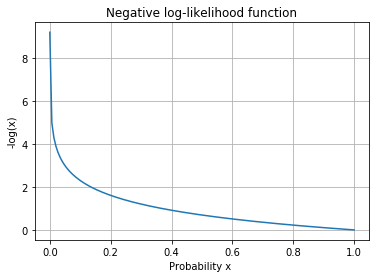

In [0]:
#Show cross-entropy loss function


x = np.linspace(0.0001, 1, num=150, endpoint=True)
y = -np.log(x)

plt.plot(x,y)
plt.title('Negative log-likelihood function')
plt.xlabel('Probability x ')
plt.ylabel('-log(x)')
plt.grid()

#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

Answer the following questions:


1.   How is the the negative log-likelihood of p affected when p is small? How about when p is large?

  ANS: The closest the probability p the larger the value of the negative log probability will rapidly increase, and as the value of the p approaches 1 the cost function will go towards a value of zero. 

2.   Why does the behavior of the negative log-likelihood function make it a good objective function for a minimization problem specifically when the output can be interpreted as a probability space?

  ANS: The negative log-likelihood functions is a good objective function because it will look for functions that produce high probability outputs during the minimization problem. This happens since the negative log-likelihood will produce low values when the probability of belonging to a class is high.




#Part 2: Overfit CNN

In [0]:


#Create and train model architecture
def CNN_overfit():
    #Easiest way to build model in Keras is using Squential. It allows models to 
    #be built layer by layer as we will do here
    model = Sequential()
    model.add(Conv2D(256, (3,3), strides=(1, 1), padding='valid', input_shape=(28, 28, 1 ) ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3,3), strides=(1, 1), padding='valid') )
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))      
    
   
    #FILL THIS IN WITH MODEL ARCHITECTURE

    return model

#Create instance of CNN model graph
model = CNN_overfit()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
model.compile(loss=categorical_crossentropy, optimizer=RMSprop(), metrics=['accuracy']) 

#Train the model and assign training meta-data to a variable
#FILL THIS IN
history = model.fit(data_train, labels_train, batch_size=64,epochs=200,verbose=1, validation_data=(data_test, labels_test))

#Print accuracy of model on testing set after training 
#FILL THIS IN
finalScore = model.evaluate(data_test, labels_test, verbose=1)
print("Final Score on ", finalScore)

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 17s 278us/step - loss: 0.4440 - acc: 0.8377 - val_loss: 0.4296 - val_acc: 0.8421
Epoch 2/200
60000/60000 [==============================] - 16s 274us/step - loss: 0.2898 - acc: 0.8930 - val_loss: 0.3083 - val_acc: 0.8916
Epoch 3/200
60000/60000 [==============================] - 16s 272us/step - loss: 0.2388 - acc: 0.9128 - val_loss: 0.3716 - val_acc: 0.8794
Epoch 4/200
60000/60000 [==============================] - 16s 273us/step - loss: 0.2036 - acc: 0.9251 - val_loss: 0.2892 - val_acc: 0.9041
Epoch 5/200
60000/60000 [==============================] - 16s 273us/step - loss: 0.1767 - acc: 0.9348 - val_loss: 0.3005 - val_acc: 0.9079
Epoch 6/200
60000/60000 [==============================] - 16s 274us/step - loss: 0.1529 - acc: 0.9438 - val_loss: 0.3596 - val_acc: 0.8835
Epoch 7/200
60000/60000 [==============================] - 16s 272us/step - loss: 0.1374 - acc: 0.9498 - val_l

In [0]:
#PRINT FINAL LOSS AND ACCURACY IN TESTING SET
print("Final Loss:     {:.4f}".format(finalScore[0]))
print("Final Accuracy: {:.4f}".format(finalScore[1]))

Final Loss:     1.5329
Final Accuracy: 0.9015


Training final loss value:  0.07095354700959247


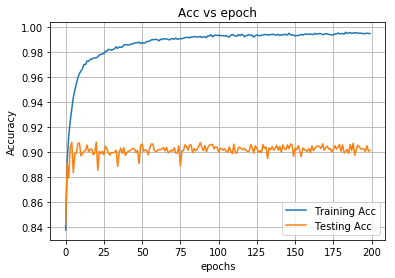

In [0]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(history.history['acc'], label='Training Acc')
plt.plot(history.history['val_acc'], label='Testing Acc')
plt.title("Acc vs epoch")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

print("Training final loss value: ", history.history['loss'][-1])

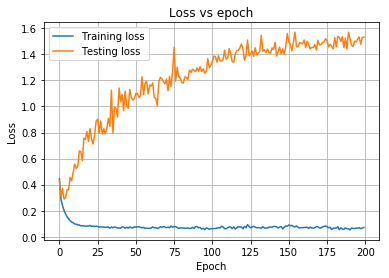

In [0]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Testing loss')
plt.title("Loss vs epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()


Answer the following questions: 



1.   What does the loss of the training set go to? 

  ANS:  The training set loss reduces quickly to a value of approximate 0.1 after the first 20 epochs, and then it keeps lowering slowly for the the rest of the training until it reach a value of 0.0709.

2.   What does the loss of the testing set go to? 

  ANS: The testing loss reduces slightly during the first 5 epochs, and then it increases until it reaches a value of 1.5.
  
3.   What is the reason for the discrepancy between the training and testing set loss? 

  ANS: The discrepancy between the training loss and the testing loss could be explain by a overfitting of the model on the training data. Since in this first model we are not using any type of regularization technique, the model keeps lowering the training loss as the epochs goes by. The consequence of overfitting is that the model losses it's ability to generalize to new unseen samples, as the model memorizes more and more the training data.

4.   Explain why the accuracy of the testing set, after training, differs so much from the testing set regardless of achieving high training accuracy. Name two ways to avoid this. 

  ANS: Due to the overfitting effect having a high training accuracy will not assure having good results in the testing data. In some cases like when the samples in the training data are affected by noise is better not to let the model have high classification accuracies since the model will compromise it's ability to classify unseen data. One way of solving overfitting in convolutional networks it's to add regularization schemes which penalize the weights of the model, so that it cannot fit exactly the training data. Another option, could be reducing the number of training epochs.

#Part 3: Dropout on input layer

In [0]:
#Create and train model architecture
def CNN_dropout_in():
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE
    model.add(Dropout(0.3, input_shape=(28, 28, 1 )))
    model.add(Conv2D(256, (3,3), strides=(1, 1), padding='valid',activation='relu' ))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
    model.add(Conv2D(128, (3,3), strides=(1, 1), padding='valid', activation='relu') )
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

#Create instance of CNN model graph
model2 = CNN_dropout_in()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
model2.compile(loss=categorical_crossentropy, optimizer=RMSprop(lr=0.0006), metrics=['accuracy']) 

#Train the model and assign training meta-data to a variable
#FILL THIS IN
history2 = model2.fit(data_train, labels_train, batch_size=64,epochs=200,verbose=1, validation_data=(data_test, labels_test))

#Print accuracy of model on testing set after training 
#FILL THIS IN
finalScore2 = model2.evaluate(data_test, labels_test, verbose=1)
print("Final Score on ", finalScore2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 19s 313us/step - loss: 0.5616 - acc: 0.7889 - val_loss: 0.4803 - val_acc: 0.8232
Epoch 2/200
60000/60000 [==============================] - 18s 295us/step - loss: 0.3855 - acc: 0.8564 - val_loss: 0.3881 - val_acc: 0.8592
Epoch 3/200
60000/60000 [==============================] - 18s 296us/step - loss: 0.3469 - acc: 0.8697 - val_loss: 0.3743 - val_acc: 0.8612
Epoch 4/200
60000/60000 [==============================] - 18s 295us/step - loss: 0.3217 - acc: 0.8797 - val_loss: 0.3681 - val_acc: 0.8657
Epoch 5/200
60000/60000 [==============================] - 18s 295us/step - loss: 0.3046 - acc: 0.8861 - val_loss: 0.3794 - val_acc: 0.8546
Epoch 6/200
60000/60000 [==============================] - 18s 295us/step - loss: 0.2914 - acc: 0.8902 - val_loss: 0.3575 - val_acc: 0.8649
Epoch 7/200
60000/60000 [==============================] - 18s 297us/step - loss: 0.2810 - acc: 0.8939 - val_l

In [0]:
#PRINT FINAL LOSS AND ACCURACY IN TESTING SET
print("Accuracy and Loss in test set")
print("Final Loss:     {:.4f}".format(finalScore2[0]))
print("Final Accuracy: {:.4f}".format(finalScore2[1]))

print("Accuracy and Loss in train set")
print("Training final loss value: ", history2.history['loss'][-1])
print("Training final acc value:  ",  history2.history['acc'][-1])

Accuracy and Loss in test set
Final Loss:     0.5132
Final Accuracy: 0.8072
Accuracy and Loss in train set
Training final loss value:  0.2913244079907735
Training final acc value:   0.8978833333333334


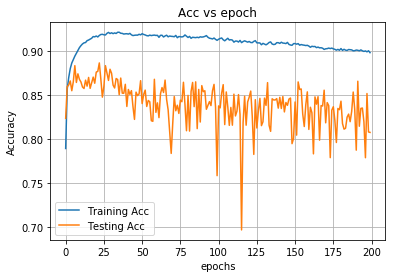

In [0]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(history2.history['acc'], label='Training Acc')
plt.plot(history2.history['val_acc'], label='Testing Acc')
plt.title("Acc vs epoch")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()




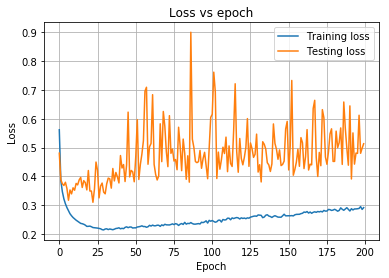

In [0]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(history2.history['loss'], label='Training loss')
plt.plot(history2.history['val_loss'], label='Testing loss')
plt.title("Loss vs epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()

Answer the following questions: 



1.   What does the loss of the training set go to? 

  ANS: 
  
2.   What does the loss of the testing set go to? 

  ANS: 

3.   Why is the loss of the training set so different from the loss of the testing set regardless of using dropout? 

  ANS:

In [0]:
##TEST##

#Create and train model architecture
def CNN_dropout_in():
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE
    model.add(Dropout(0.3, input_shape=(28, 28, 1 )))
    model.add(Conv2D(256, (3,3), strides=(1, 1), padding='valid',activation='relu' ))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
    model.add(Conv2D(128, (3,3), strides=(1, 1), padding='valid', activation='relu') )
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

#Create instance of CNN model graph
model2_test = CNN_dropout_in()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
model2_test.compile(loss=categorical_crossentropy, optimizer=RMSprop(lr = 0.0006), metrics=['accuracy']) 

#Train the model and assign training meta-data to a variable
#FILL THIS IN
history2_test = model2_test.fit(data_train, labels_train, batch_size=1024, epochs=200,verbose=1, validation_data=(data_test, labels_test))

#Print accuracy of model on testing set after training 
#FILL THIS IN
finalScore2_test = model2_test.evaluate(data_test, labels_test, verbose=1)
print("Final Score on ", finalScore2_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 12s 203us/step - loss: 1.1351 - acc: 0.5750 - val_loss: 0.8322 - val_acc: 0.6774
Epoch 2/200
60000/60000 [==============================] - 11s 190us/step - loss: 0.6648 - acc: 0.7435 - val_loss: 0.6511 - val_acc: 0.7634
Epoch 3/200
60000/60000 [==============================] - 11s 191us/step - loss: 0.5632 - acc: 0.7862 - val_loss: 0.6103 - val_acc: 0.7913
Epoch 4/200
60000/60000 [==============================] - 11s 190us/step - loss: 0.5029 - acc: 0.8108 - val_loss: 0.5421 - val_acc: 0.8112
Epoch 5/200
60000/60000 [==============================] - 11s 190us/step - loss: 0.4629 - acc: 0.8265 - val_loss: 0.5061 - val_acc: 0.8292
Epoch 6/200
60000/60000 [==============================] - 11s 191us/step - loss: 0.4377 - acc: 0.8362 - val_loss: 0.4999 - val_acc: 0.8249
Epoch 7/200
60000/60000 [==============================] - 11s 190us/step - loss: 0.4143 - acc: 0.8440 - val_l

In [0]:
#PRINT FINAL LOSS AND ACCURACY IN TESTING SET
print("Accuracy and Loss in test set")
print("Final Loss:     {:.4f}".format(finalScore2_test[0]))
print("Final Accuracy: {:.4f}".format(finalScore2_test[1]))

print("Accuracy and Loss in train set")
print("Training final loss value: ", history2_test.history['loss'][-1])
print("Training final acc value:  ",  history2_test.history['acc'][-1])

Accuracy and Loss in test set
Final Loss:     0.5117
Final Accuracy: 0.8826
Accuracy and Loss in train set
Training final loss value:  0.04052767635683219
Training final acc value:   0.9855666669209798


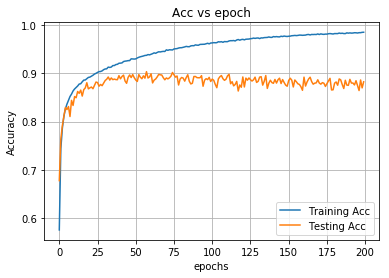

In [0]:
plt.plot(history2_test.history['acc'], label='Training Acc')
plt.plot(history2_test.history['val_acc'], label='Testing Acc')
plt.title("Acc vs epoch")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

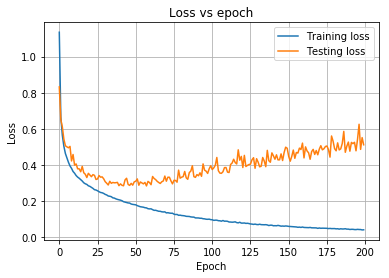

In [0]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(history2_test.history['loss'], label='Training loss')
plt.plot(history2_test.history['val_loss'], label='Testing loss')
plt.title("Loss vs epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()

#Part 4: Dropout on Hidden Layers

In [0]:
#Create and train model architecture
def CNN_dropout_hidden():
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE
    model.add(Conv2D(256, (3,3), strides=(1, 1), padding='valid', input_shape=(28, 28, 1 ), activation='relu' ))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3,3), strides=(1, 1), padding='valid', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

#Create instance of CNN model graph
model4 = CNN_dropout_hidden()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
model4.compile(loss=categorical_crossentropy, optimizer=RMSprop(lr = 0.0006), metrics=['accuracy']) 

#Train the model and assign training meta-data to a variable
#FILL THIS IN
history4 = model4.fit(data_train, labels_train, batch_size=2048 ,epochs=200,verbose=1, validation_data=(data_test, labels_test))

#Print accuracy of model on testing set after training 
#FILL THIS IN
finalScore4 = model4.evaluate(data_test, labels_test, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 22s 361us/step - loss: 1.3456 - acc: 0.4994 - val_loss: 0.8920 - val_acc: 0.6670
Epoch 2/200
60000/60000 [==============================] - 21s 347us/step - loss: 0.7547 - acc: 0.7103 - val_loss: 0.6947 - val_acc: 0.7360
Epoch 3/200
60000/60000 [==============================] - 21s 347us/step - loss: 0.6242 - acc: 0.7602 - val_loss: 0.6273 - val_acc: 0.7689
Epoch 4/200
60000/60000 [==============================] - 21s 347us/step - loss: 0.5466 - acc: 0.7932 - val_loss: 0.5626 - val_acc: 0.7997
Epoch 5/200
60000/60000 [==============================] - 21s 347us/step - loss: 0.4933 - acc: 0.8135 - val_loss: 0.5201 - val_acc: 0.8157
Epoch 6/200
60000/60000 [==============================] - 21s 347us/step - loss: 0.4555 - acc: 0.8325 - val_loss: 0.4727 - val_acc: 0.8336
Epoch 7/200
60000/60000 [==============================] - 21s 347us/step - loss: 0.4312 - acc: 0.8381 - val_l

In [0]:
#PRINT FINAL LOSS AND ACCURACY IN TESTING SET
print("Final Loss:     {:.4f}".format(finalScore4[0]))
print("Final Accuracy: {:.4f}".format(finalScore4[1]))

Final Loss:     0.4638
Final Accuracy: 0.9142


Training final loss value:  0.007774257939184705


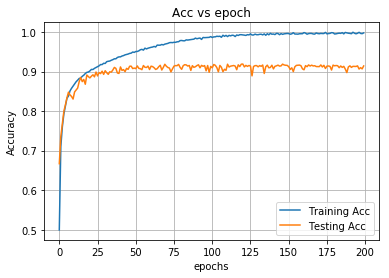

In [0]:
import matplotlib.pyplot as plt
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(history4.history['acc'], label='Training Acc')
plt.plot(history4.history['val_acc'], label='Testing Acc')
plt.title("Acc vs epoch")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

print("Training final loss value: ", history4.history['loss'][-1])

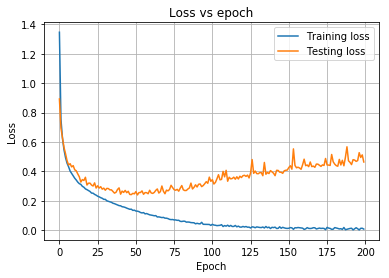

In [0]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(history4.history['loss'], label='Training loss')
plt.plot(history4.history['val_loss'], label='Testing loss')
plt.title("Loss vs epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()

Answer the following questions:



1.   What does the loss of the training set go to? 

  ANS: 
  
2.   What does the loss of the testing set go to? 

  ANS: 

3.   Why was using dropout more effective here in comparison to the architecture in Part 3? 

  ANS: 
  
4.   What is the difference in accuracy, after training, between the training and testing set? Is the model a good fit for the data? 

  ANS: 

#Part 5: Dropout on Input and Hidden Layers

In [0]:
#Create and train model architecture
def CNN_dropout_both():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE
    model.add(Dropout(0.3, input_shape=(28, 28, 1 )))
    model.add(Conv2D(256, (3,3), strides=(1, 1), padding='valid' ))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3,3), strides=(1, 1), padding='valid'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    return model


#Create instance of CNN model graph
model5 = CNN_dropout_both()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
model5.compile(loss=categorical_crossentropy, optimizer=RMSprop(lr = 0.0006), metrics=['accuracy']) 

#Train the model and assign training meta-data to a variable
history5 = model5.fit(data_train, labels_train, batch_size=2048,epochs=200,verbose=1, validation_data=(data_test, labels_test))

#Print accuracy of model on testing set after training 
#FILL THIS IN
finalScore5 = model5.evaluate(data_test, labels_test, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 19s 314us/step - loss: 1.3138 - acc: 0.5325 - val_loss: 1.0586 - val_acc: 0.6050
Epoch 2/200
60000/60000 [==============================] - 18s 297us/step - loss: 0.7322 - acc: 0.7185 - val_loss: 0.8315 - val_acc: 0.7096
Epoch 3/200
60000/60000 [==============================] - 18s 297us/step - loss: 0.6269 - acc: 0.7584 - val_loss: 0.9369 - val_acc: 0.6652
Epoch 4/200
60000/60000 [==============================] - 18s 297us/step - loss: 0.5729 - acc: 0.7792 - val_loss: 0.8260 - val_acc: 0.7037
Epoch 5/200
60000/60000 [==============================] - 18s 297us/step - loss: 0.5266 - acc: 0.7993 - val_loss: 0.7926 - val_acc: 0.7316
Epoch 6/200
60000/60000 [==============================] - 18s 298us/step - loss: 0.4990 - acc: 0.8104 - val_loss: 0.8139 - val_acc: 0.7134
Epoch 7/200
60000/60000 [==============================] - 18s 297us/step - loss: 0.4761 - acc: 0.8213 - val_l

In [0]:
#PRINT FINAL LOSS AND ACCURACY IN TESTING SET
print("Final Loss:     {:.4f}".format(finalScore5[0]))
print("Final Accuracy: {:.4f}".format(finalScore5[1]))

Final Loss:     1.2628
Final Accuracy: 0.7509


Training final loss value:  0.134567116355896
Training final acc  value:  0.9486166666984558


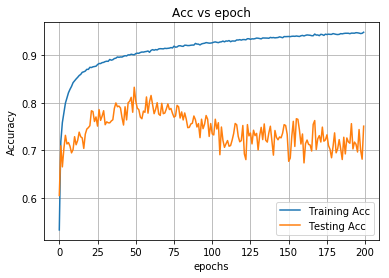

In [0]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(history5.history['acc'], label='Training Acc')
plt.plot(history5.history['val_acc'], label='Testing Acc')
plt.title("Acc vs epoch")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

print("Training final loss value: ", history5.history['loss'][-1])
print("Training final acc  value: ", history5.history['acc'][-1])


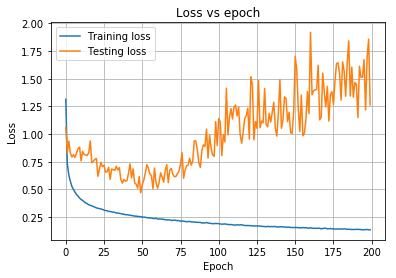

In [0]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(history5.history['loss'], label='Training loss')
plt.plot(history5.history['val_loss'], label='Testing loss')
plt.title("Loss vs epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()

Answer the following questions: 

1.   What does the loss of the training set go to? 

  ANS: 
  
2.   What does the loss of the testing set go to? 

  ANS:
  
3.   What is the difference in accuracy, after training, between the training and testing set?  

  ANS: 
  
4.   Compare the plots obtained in this part to the plots from Part 4. Did using dropout in the input layer, in addition to using dropout in the hidden layers as in Part 4, significantly increase the robustness of your model? 

  ANS: 

#Part 6: Creating a CLDNN

Run the code in the block below 'as is.' After executing, the high SNR RadioML training and testing data will be stored in the arrays X_train and X_test, respectively. Their respective one-hot labels will be stored in Y_train and Y_test. 

In [0]:
import pickle 
import numpy as np
#Download RML 2016.10b dataset and untar file
#!wget http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
#!tar -xvjf RML2016.10b.tar.bz2

#Extract high SNR data and obtain their corresponding lables 
Xd = pickle.load(open("RML2016.10b.dat",'rb'),  encoding='latin1')
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []
lbl = []
for mod in mods:
    for snr in snrs:
        if snr > 0:
            X.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

np.random.seed(2016)
n_examples = X.shape[0]
n_train = n_examples * 0.8
n_train = int(n_train)
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]

def to_onehot(yy):
    yy = list(yy)
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1

Y_train = to_onehot(map(lambda x: mods.index(lbl[x][0]), train_idx))
Y_test = to_onehot( map(lambda x: mods.index(lbl[x][0]) ,  test_idx))

#Re-shape data to appropriate dimensions 
X_train = X_train.reshape(432000, 2, 128, 1)
X_test = X_test.reshape(108000, 2, 128, 1)

In [0]:
from keras.layers import Activation

#Create and train model architecture
def cldnn():
    model = Sequential()
    
    #FILL THIS IN WITH MODEL ARCHITECTURE
    model.add(Conv2D(256, (1,3), strides=(1, 1), padding='valid', input_shape=(2, 128, 1 ), activation='relu' ))
    model.add(Dropout(0.2))
    model.add(Conv2D(256, (2,3), strides=(1, 1), padding='valid', activation='relu' ))
    model.add(Conv2D(80, (1,3), strides=(1, 1), padding='valid', activation='relu' ))
    model.add(Dropout(0.2))
    model.add(Conv2D(80, (1,3), strides=(1, 1), padding='valid', activation='relu' ))
    
    #Reshaping
    model.add(Reshape((120, 80)))
    model.add(LSTM(50, use_bias=False))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    return model

#Create instance of CNN model graph
convLstm = cldnn()

convLstm.summary()

#Compile model using an appropriate loss and optimizer algorithm
convLstm.compile(loss=categorical_crossentropy, optimizer=RMSprop(), metrics=['accuracy']) 

#Train the model and assign training meta-data to a variable
history6 = convLstm.fit(X_train, Y_train, batch_size=1024, epochs=1, verbose=1, validation_data=(X_test, Y_test), shuffle= True)

#Print accuracy of model on testing set after training 
#FILL THIS IN
finalScore6 = convLstm.evaluate(X_test, Y_test, verbose=1)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 2, 126, 256)       1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 126, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 124, 256)       393472    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 122, 80)        61520     
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 122, 80)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 120, 80)        19280     
_

In [0]:
#finalScore6 = convLstm.evaluate(X_test, Y_test, verbose=1)
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
print(history6.history['acc'])

[0.21172453705469768]


In [0]:
print(finalScore6)
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

[1.6054716020513464, 0.3454259259259259]


Answer the following questions: 



1.   Is this model a good fit for the data?  

  ANS: 

2.   Give two ways to improve the robustness of the model.

  ANS: 